In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow
import keras as k
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.callbacks import EarlyStopping
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv(r"C:\Users\madas\Downloads\image_features.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,7.471778,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Beagle
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,12.284823,0.0,0.00000,0.000000,0.0,0.0,0.965516,0.0,Beagle
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,32.25053,19.687479,0.0,0.0,0.000000,0.0,Beagle
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Beagle
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Beagle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Dachshund
963,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,1.037026,0.0,Dachshund
964,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Dachshund
965,0.0,0.0,0.0,9.154397,21.366907,0.0,0.0,0.0,60.754963,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,Dachshund


In [ ]:
df['label'].un

In [3]:
# Data Preprocessing
X = df.drop('label', axis=1)
y = df['label']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.99


In [8]:
from tensorflow.keras.applications import VGG16

In [9]:
vgg16 = VGG16(include_top=True, weights='imagenet', input_shape=(224,224,3))

In [10]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [12]:
# Encode labels to integers
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



In [13]:
# Convert integers to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


In [14]:
x_train.shape

(773, 25088)

In [15]:

# Define the ANN model
model = Sequential()
model.add(Dense(25088, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(25088, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

model.summary()

C:\Users\madas\anaconda3\envs\Laxman\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 25088)               │     629,432,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25088)               │     629,432,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │         250,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,259,116,554 (4.69 GB)

 Trainable params: 1,259,116,554 (4.69 GB)

 Non-trainable params: 0 (0.00 B)

In [16]:
le.classes_

array(['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd',
       'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler',
       'Yorkshire_Terrier'], dtype=object)

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [18]:
es = EarlyStopping(monitor='val_loss',
    min_delta=0.01,
    patience=1,
    verbose=1,
    mode='min',
    baseline=None,
    restore_best_weights=False)

In [ ]:
# Train the model
history = model.fit(x_train, y_train_categorical, epochs=1, batch_size=32, validation_data=(x_test, y_test_categorical),callbacks =[es])

In [171]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print(f"ANN Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9803 - loss: 0.4441
ANN Accuracy: 0.97


In [172]:
# Save the ANN model
model.save('ann_model.h5')


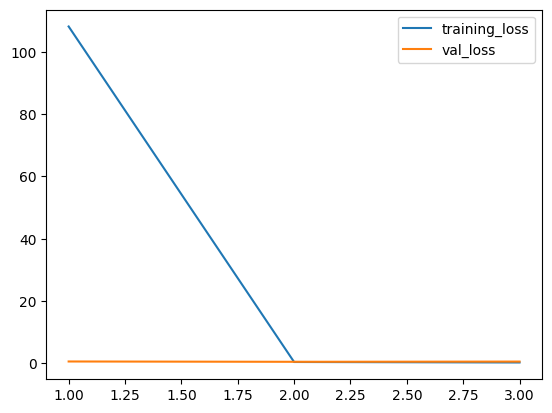

In [174]:
plt.plot(range(1,4),history.history["loss"],label = "training_loss")
plt.plot(range(1,4),history.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

In [175]:
import cv2

In [176]:
img = cv2.imread(r"C:\Users\madas\Downloads\Beagle_1.jpg")

In [177]:
img.shape

(107, 162, 3)

In [178]:
arr = cv2.resize(img, (224,224))

In [179]:
arr[np.newaxis].shape

(1, 224, 224, 3)

In [182]:
np.argmax(vgg16.predict(arr[np.newaxis]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


167

In [183]:
le.inverse_transform([np.argmax(vgg16.predict(arr[np.newaxis]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


ValueError: y contains previously unseen labels: [167]

In [86]:
model.predict(arr[np.newaxis])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_8_1/Cast:0", shape=(1, 25088, 773, 3), dtype=float32). Expected shape (None, 25088), but input has incompatible shape (1, 25088, 773, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 25088, 773, 3), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
plt.imshow(img)

In [37]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Sample list of dog breed labels
labels = ['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd',
       'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler',
       'Yorkshire_Terrier']

# Initialize and fit the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Save the label encoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [100]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os
import pandas as pd

In [97]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


In [98]:
def extract_features(img_path, model):
    img_array = preprocess_image(img_path)
    features = model.predict(img_array)
    return features.flatten()  # Ensure the output is a flattened vector


In [101]:
# Load the pretrained VGG16 model without the top layer for feature extraction
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Load the trained ANN model
ann_model = tf.keras.models.load_model('ann_model.h5')


In [102]:
def predict_new_image(img_path, feature_extractor_model, ann_model, label_encoder):
    # Extract features from the new image
    features = extract_features(img_path, feature_extractor_model)
    features = np.expand_dims(features, axis=0)  # Adjust shape for prediction

    # Predict using the ANN model
    predictions = ann_model.predict(features)
    predicted_class_index = np.argmax(predictions, axis=1)

    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_class_index)
    return predicted_label[0]

# Example usage
new_image_path = r'C:\Users\madas\Downloads\Beagle_1.jpg'
predicted_label = predict_new_image(new_image_path, model, ann_model, le)
print(f"The predicted label for the new image is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The predicted label for the new image is: Beagle


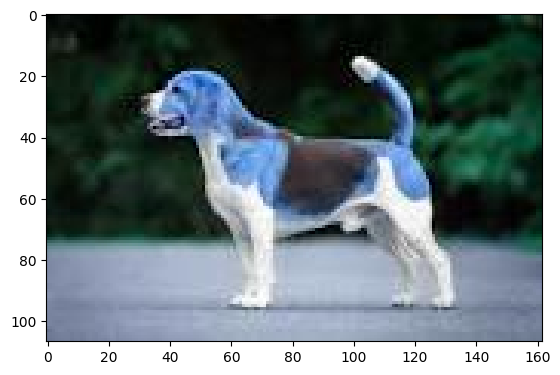

In [105]:
plt.imshow(img)